Synthetic case CA-ST (diffusion only)(avg from data noise) (06 may, no additional data, this one with additional data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
from advection_diffusion_inference_utils import (read_experiment_data,
                                                 build_grids,
                                                 plot_time_series,
                                                 read_data_files)
import cuqi


dill version:  0.3.6


In [2]:
def matplotlib_setup(SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE):
    plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 

In [3]:
list_CASTSynthDiff = np.array(['../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png',
       '../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/experiment_m3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5.png'])

print(len(list_CASTSynthDiff))

7


In [4]:

ipyplot.plot_images(list_CASTSynthDiff, img_width=800/3)

Corresponding real ones (but 0.2 noise): CA-ST (diffusion only)

In [5]:
list_CASTRealDiff = np.array(['../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm6_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m6_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png',
       '../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm6_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/experiment_m6_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5.png'])

print(len(list_CASTRealDiff))

6


In [6]:
ipyplot.plot_images(list_CASTRealDiff, img_width=800/3)

All the cases / noise level from data average variance / Sampler NUTS / 3000 samples / ~12 hrs:

### Inverse:
1. CA (diffusion only)
    - 1.1. synthetic (m1-l) : 4 cases
        - constant/constant
        - constant/varying
        - varying/constant
        - varying/varying
    - 1.2. real (all mice, all ears) : 8 cases
        - varying


2. CA-ST (diffusion only)
    - 2.1 synthetic (m1-l) : 1 case
        - varying
    - 2.2 real (all mice, all ears) : 8 cases
        - varying

3. CA (advection-diffusion)
    - 3.1 synthetic (m1-l) : 2 cases
        - varying/small_a/varying
        - varying/large_a/varying
    - 3.2 real (all mice, all ears) : 8 cases
        - varying

Total number of cases: 4+ 8+ 1+ 8+ 2+ 8 = 31
Number of runs: 4 major runs: 
Create table
| Case | Number of runs | label | notes: | running? |
| --- | --- | --- | --- | --- |
| <font color='green'>1.1 </font>  | 4 | v14septCASynthDiff | | yes 9:00 am (2 done, 1 is running that is extra not needed) (results9)|
| <font color='red'>1.2 </font>| 10? or 8 | v14septCARealDiff | | yes 11:54 (results11) |
| <font color='red'>2.1 </font> | 10? or 8 | v14septCASTSynthDiff | it is okay to use old results, list_CASTSynthDiff above| yes 12:38 (results13) |
| <font color='red'>2.2 </font> | 10? or 8 | v14septCASTRealDiff | it is okay to use old results, list_CASTRealDiff above| yes 1:22 (results15) |
| <font color='red'>3.1 </font> | 2 | v14septCASynthAdvDiff | | yes 7:30 am (results8) |
| <font color='red'>3.2 </font> | 10? or 8 | v14septCARealAdvDiff | | yes 11:40 (results10) |

**note**

results12 and results14 on hpc cluster can be deleted.


### Forward:
- Multiple advection for various Peclet numbers
- 2D photo of solution? or video?

### Analysis:
- The things I normally show (for at least one case)
- Look at the average mouse (1.2)
- The average mouse results
- Correlation between average diffusivity and a
- Table of errors in data / in reconstruction. The latter is for the synthetic cases.
- comment on Peclet number, advection or diffusion dominant
- overlay diffusivity CI when advection is present and when it is not
- Look at the data, real and synthetic and comment on the noise level

### Error in estimation: (only heterogenous diffusivity and heterogenous inference)

Synth:
| Case | Error in data | Recon. error (diffusivity) | Recon. error (advection) | STD norm |
| --- | --- | --- | --- | --- |
| CA (diffusion only) | - | - | - | - |
| CA-ST (diffusion only)(avg mice) |  |  |  |  |
| CA-ST (diffusion only)(avg max mice) |  |  |  |  |
| CA-ST (diffusion only)(avg min mice) |  |  |  |  |
| CA (advection-diffusion) (small a) |  |  |  |  |
| CA (advection-diffusion) (large a) |  |  |  |  |


Real:

| Case | Error in data | STD norm |
| --- | --- | --- |
| CA (diffusion only)(avg mice) | 0.17690154813286393 | 0.2295067779793036 |
| CA (diffusion only)(max mice) |0.2199207763933959 | 0.26911365186318764 |
| CA (diffusion only)(min mice) | 0.10139680716793516 | 0.16621317851093573 |
| CA-ST (diffusion only)(avg mice) | 0.3398625123709785 | 0.3688436459190743  |
| CA-ST (diffusion only)(max mice) | 0.42450370330550485 | 0.4668007265458224 |
| CA-ST (diffusion only)(min mice) | 0.29510029029406404 | 0.2555836495771276 |
| CA (advection-diffusion) (avg mice) | 0.17828599872245435  |  0.2295067779793036  |
| CA (advection-diffusion) (max mice) |0.22240821645751177  | 0.26911365186318764 |
| CA (advection-diffusion) (min mice) |0.1022123026197473  | 0.16621317851093573 |


Numbers shortened 
| Case | Error in data recon. | STD norm |
| --- | --- | --- |
| CA (diffusion only)(avg mice) | 0.176 | 0.229 |
| CA (diffusion only)(max mice) |0.219 | 0.269 |
| CA (diffusion only)(min mice) | 0.101 | 0.166 |
| CA-ST (diffusion only)(avg mice) | 0.339 | 0.368  |
| CA-ST (diffusion only)(max mice) | 0.424 | 0.466 |
| CA-ST (diffusion only)(min mice) | 0.295 | 0.255 |
| CA (advection-diffusion) (avg mice) | 0.178  |  0.229  |
| CA (advection-diffusion) (max mice) |0.222  | 0.269 |
| CA (advection-diffusion) (min mice) |0.102  | 0.166 |

```
min 0.16621317851093573
max 0.26911365186318764
avg 0.2295067779793036

** eleminate the cases that are not convergent **
** make sure the two for CA have the same cases and the same cases only **

v14septCARealDiff
data error list
[0.21992078 0.19322845 0.10139681 0.1933031  0.19130473 0.12002365
 0.21913333]
min 0.10139680716793516
max 0.2199207763933959
avg 0.17690154813286393
std_over_data_list
[0.25560618 0.2547349  0.16621318 0.2547349  0.228329   0.17781562
 0.26911365]
min 0.16621317851093573
max 0.26911365186318764
avg 0.2295067779793036


v_April22_2024_a (CA-ST (diffusion only)(avg mice))
data error list
min 0.29510029029406404
max 0.42450370330550485
avg 0.3398625123709785
std_over_data_list
min 0.2555836495771276
max 0.4668007265458224
avg 0.3688436459190743


v14septCARealAdvDiff
data error list
[0.2215984  0.19338265 0.1022123  0.19425452 0.19281899 0.12132692
 0.22240822]
min 0.1022123026197473
max 0.22240821645751177
avg 0.17828599872245435
std_over_data_list
[0.25560618 0.2547349  0.16621318 0.2547349  0.228329   0.17781562
 0.26911365]
min 0.16621317851093573
max 0.26911365186318764
avg 0.2295067779793036
```





- define error in data
- define error in reconstruction for both diffusivity and advection
- overlay advection and diffusion based diffusivity CI


## 1. CA (diffusion only)

### 1.1. Synthetic (m1-l) (4 cases) (constant/constant, constant/varying, varying/constant, varying/varying)

In [7]:

v14septCASynthDiff_tags =\
["m1_l_NUTS_constant_100.0_syntheticFromDiffusion_constant_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero",
"m1_l_NUTS_constant_100.0_syntheticFromDiffusion_heterogeneous_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero",
"m1_l_NUTS_smooth_50_200_syntheticFromDiffusion_constant_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero",
"m1_l_NUTS_smooth_50_200_syntheticFromDiffusion_heterogeneous_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero"]

v14septCASynthDiff_dir = ["../../../Collab-BrainEfflux-Data/results9/"]*len(v14septCASynthDiff_tags)

#m1_l_NUTS_smooth_50_200_syntheticFromDiffusion_constant_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero  
#m1_l_NUTS_smooth_50_200_syntheticFromDiffusion_heterogeneous_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero

In [8]:
# read the data
data_v14septCASynthDiff = [read_experiment_data(v14septCASynthDiff_dir[i], v14septCASynthDiff_tags[i]) for i in range(len(v14septCASynthDiff_tags))]

Reading file:  ../../../Collab-BrainEfflux-Data/results9//outputm1_l_NUTS_constant_100.0_syntheticFromDiffusion_constant_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero/m1_l_NUTS_constant_100.0_syntheticFromDiffusion_constant_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/results9//outputm1_l_NUTS_constant_100.0_syntheticFromDiffusion_heterogeneous_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero/m1_l_NUTS_constant_100.0_syntheticFromDiffusion_heterogeneous_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/results9//outputm1_l_NUTS_smooth_50_200_syntheticFromDiffusion_constant_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero/m1_l_NUTS_smooth_50_200_syntheticFromDiffusion_constant_3000_fromDataAvg_v14septCASynthDiff__0_5_0.1_zero_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/results9//outputm1_l_NUTS_smooth_50_200_syntheticFromDiffusion_heterogeneous_3000_from

In [9]:
# extract the samples and exact values, etc
samples_list = []
exact_list = []
locations_list = []
ess_list = []
data_list = []
mean_recon_data_list = []
times_list = []
exact_data_list = []
c_geom_list = []
L_list = []
short_tag = []
for j, data_dict in enumerate(data_v14septCASynthDiff):
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])
    data_list.append(data_dict['data'])
    mean_recon_data_list.append(data_dict['mean_recon_data'])
    times_list.append(data_dict['times'])
    exact_data_list.append(data_dict['exact_data'])
    short_tag.append(v14septCASynthDiff_tags[j].split('_')[0] + ' ' + v14septCASynthDiff_tags[j].split('_')[1])
    # WARNING MAKE SURE THIS FACTOR IS CONSISTENT 
    factor = 1.2
    L_list.append(locations_list[-1][-1] * factor)


<div style="border: 2px solid #FFB74D; background-color: #FFF3E0; border-radius: 8px; padding: 10px; font-family: Arial, sans-serif; color: #333; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1); max-width: 750px; margin: 0 auto;">
  <strong style="color: #E65100;">⚠️ Note:</strong> 
Note: the varying in space results are not convergent
</div>

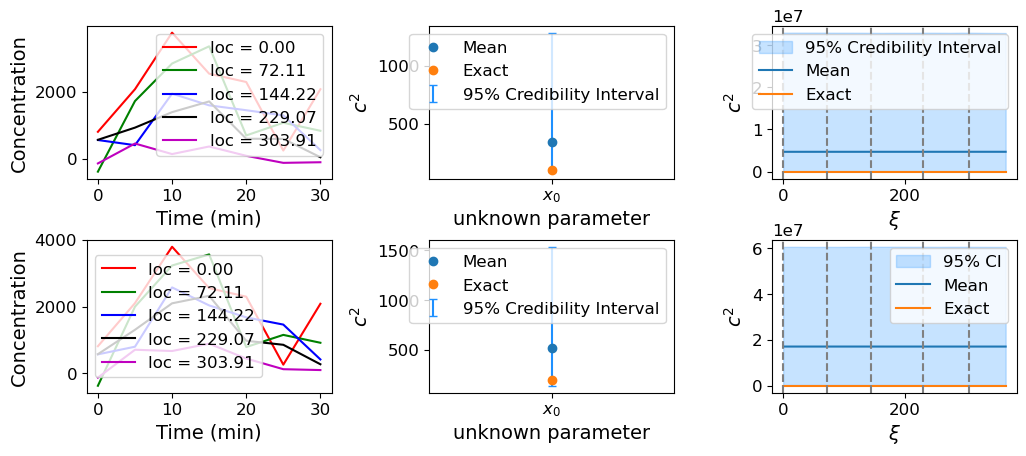

In [10]:
# Figure 1
matplotlib_setup(12, 14, 16)





# Create figure
figure, axs = plt.subplots(2,3, figsize=(12, 6.5*2.2/3))
#---------------------- time series for the constant real parameter case
idx00 = 0
plt.sca(axs[0, 0])
plot_time_series(times_list[idx00], locations_list[idx00], data_list[idx00])

# increase spacing between subplots
figure.subplots_adjust(hspace=0.4, wspace=0.4)

#---------------------- 95% CI (constant inference)
plt.sca(axs[0, 1])
idx01 = 0
exact =  cuqi.array.CUQIarray(exact_list[idx01][0],is_par=False, geometry=samples_list[idx01].geometry)
samples_list[idx01]
samples_list[idx01].plot_ci(exact = exact)
#plt.ylim([70, 150])
# set ticks labels
plt.gca().set_xticklabels(["$x_0$"])
plt.xlabel('unknown parameter')
plt.ylabel('$c^2$')

#---------------------- 95% CI (variable inference)

idx02 = 1
plt.sca(axs[0, 2])
samples_list[idx02].plot_ci(exact = exact_list[idx02])
#plt.ylim([70, 150])
# set ticks labels
plt.xlabel('$\\xi$')
plt.ylabel('$c^2$')
# plot vertical dotted lines for locations
for loc in locations_list[idx02]:
    plt.axvline(x = loc, color = 'gray', linestyle = '--')
#---------------------- time series for the variable real parameter case
# Load data

plt.sca(axs[1, 0])
idx10 = 2
plot_time_series(times_list[idx10], locations_list[idx10], data_list[idx10])


#---------------------- 95% CI (constant inference)
plt.sca(axs[1, 1])
idx11 = 2
exact =  cuqi.array.CUQIarray(exact_list[idx11][0],is_par=False, geometry=samples_list[idx11].geometry)
samples_list[idx11].plot_ci(exact = exact)

# set ticks labels
plt.gca().set_xticklabels(["$x_0$"])
plt.xlabel('unknown parameter')
plt.ylabel('$c^2$')




#---------------------- 95% CI (variable inference)

plt.sca(axs[1, 2])
idx12 = 3

samples_list[idx12].plot_ci(95, exact = exact_list[idx12])


plt.xlabel('$\\xi$')
plt.ylabel('$c^2$')
# change legend of last plot
plt.legend(['95% CI' ,'Mean', 'Exact', ])
# plot vertical dotted lines for locations
for loc in locations_list[idx12]:
    plt.axvline(x = loc, color = 'gray', linestyle = '--')




In [11]:
# Figure 2

### 1.2. Real (all mice, all ears) (8~10 cases) (varying)

In [12]:


v14septCARealDiff_tags =[
"m1_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m1_r_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m2_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m2_r_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m3_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m3_r_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m4_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m4_r_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m6_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero",
"m6_r_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero"]
v14septCARealDiff_dir = ['../../../Collab-BrainEfflux-Data/results11/']*len(v14septCARealDiff_tags)

In [13]:
# read the data
v14septCARealDiff_dict_list = []
for i in range(len(v14septCARealDiff_tags)):
    print(i)
    v14septCARealDiff_dict_list.append(read_experiment_data(v14septCARealDiff_dir[i], v14septCARealDiff_tags[i]))

0
Reading file:  ../../../Collab-BrainEfflux-Data/results11//outputm1_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero/m1_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero_var.pkl
1
Reading file:  ../../../Collab-BrainEfflux-Data/results11//outputm1_r_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero/m1_r_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero_var.pkl
2
Reading file:  ../../../Collab-BrainEfflux-Data/results11//outputm2_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero/m2_l_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero_var.pkl
3
Reading file:  ../../../Collab-BrainEfflux-Data/results11//outputm2_r_NUTS_constant_100.0_real_heterogeneous_3000_fromDataAvg_v14septCARealDiff__0_5_0.1_zero/m2_r_NUTS_constant_100.0_real_heterogeneous_3000_fromData

In [14]:
# extract the samples and exact values, etc
samples_list = []
exact_list = []
locations_list = []
ess_list = []
data_list = []
mean_recon_data_list = []
times_list = []
exact_data_list = []
c_geom_list = []
L_list = []
short_tag = []
data_error_list_v14septCARealDiff = []
std_over_data_list_v14septCARealDiff = []
new_ess_list = []

for j, data_dict in enumerate(v14septCARealDiff_dict_list):
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])
    data_list.append(data_dict['data'])
    mean_recon_data_list.append(data_dict['mean_recon_data'])
    times_list.append(data_dict['times'])
    exact_data_list.append(data_dict['exact_data'])
    short_tag.append(v14septCARealDiff_tags[j].split('_')[0] + ' ' + v14septCARealDiff_tags[j].split('_')[1])
    # WARNING MAKE SURE THIS FACTOR IS CONSISTENT 
    factor = 1.2
    L_list.append(locations_list[-1][-1] * factor)
    data_error_list_v14septCARealDiff.append(np.linalg.norm(data_list[-1]-mean_recon_data_list[-1])/ np.linalg.norm(data_list[-1]))
    # read data STD
    real_times, real_locations, real_data, real_std_data = read_data_files(data_dict['experiment_par'])
    std_over_data_list_v14septCARealDiff.append(np.linalg.norm(np.linalg.norm(real_std_data)/np.linalg.norm(real_data)))
    new_ess_list.append(ess_list[-1])



# remove idx (-1, -3, -5)
data_error_list_v14septCARealDiff = np.delete(data_error_list_v14septCARealDiff, [-1, -3, -5])
std_over_data_list_v14septCARealDiff = np.delete(std_over_data_list_v14septCARealDiff, [-1, -3, -5])
new_ess_list = [new_ess_list[i] for i in range(len(new_ess_list)) if i not in [9, 7, 5]]

print(data_dict['experiment_par'].version)
# print min, max, avg
print('data error list')
print(data_error_list_v14septCARealDiff)
print('min', np.min(data_error_list_v14septCARealDiff))
print('max', np.max(data_error_list_v14septCARealDiff))
print('avg', np.mean(data_error_list_v14septCARealDiff))

# print min, max, avg
print('std_over_data_list')
print(std_over_data_list_v14septCARealDiff)
print('min', np.min(std_over_data_list_v14septCARealDiff))
print('max', np.max(std_over_data_list_v14septCARealDiff))
print('avg', np.mean(std_over_data_list_v14septCARealDiff))
print('#################')
print(new_ess_list)
print(np.mean(new_ess_list))
print(np.min(new_ess_list))


    

CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
v14septCARealDiff
data error list
[0.21992078 0.19322845 0.10139681 0.1933031  0.19130473 0.12002365
 0.21913333]
min 0.10139680716793516
max 0.2199207763933959
avg 0.17690154813286393
std_over_data_list
[0.25560618 0.2547349  0.16621318 0.2547349  0.228329   0.17781562
 0.26911365]
min 0.16621317851093573
max 0.26911365186318764
avg 0.2295067779793036
#################
[array([372.05123827, 341.15525732, 257.01324376, 296.1477087 ,
       296.59719658, 294.42305267, 320.63939818, 321.60704615,
       319.09770153, 388.11429971, 378.11277484, 324.96019807,
       314.03794253, 251.08504563, 302.77690893, 294.54747671,
       279.57850653, 262.02767406, 259.18214591, 256.58563689,
       273.80851628]), array([298.4496333 , 279.98813598, 271.51451055, 285.00502405,
       302.29334753, 309.29502347, 312.91845214, 330.73453136,
       334.20861053, 351.08500899, 339.06191833, 306.27045337,
       26

In [15]:
len(new_ess_list)


7

In [16]:
ess_list[0]

array([372.05123827, 341.15525732, 257.01324376, 296.1477087 ,
       296.59719658, 294.42305267, 320.63939818, 321.60704615,
       319.09770153, 388.11429971, 378.11277484, 324.96019807,
       314.03794253, 251.08504563, 302.77690893, 294.54747671,
       279.57850653, 262.02767406, 259.18214591, 256.58563689,
       273.80851628])

/var/folders/rr/13wqhtdj7bx5n5j3bfdhsz5r0000gn/T/ipykernel_43122/831166847.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


['0', '72', '144', '229', '304']
([<matplotlib.lines.Line2D object at 0x1959c5f30>, <matplotlib.lines.Line2D object at 0x1959c6a70>, <matplotlib.lines.Line2D object at 0x1959c5570>, <matplotlib.lines.Line2D object at 0x1959c4640>, <matplotlib.lines.Line2D object at 0x1959c7c40>], ['loc = 0.00', 'loc = 87.18', 'loc = 187.18', 'loc = 272.03', 'loc = 344.14'])


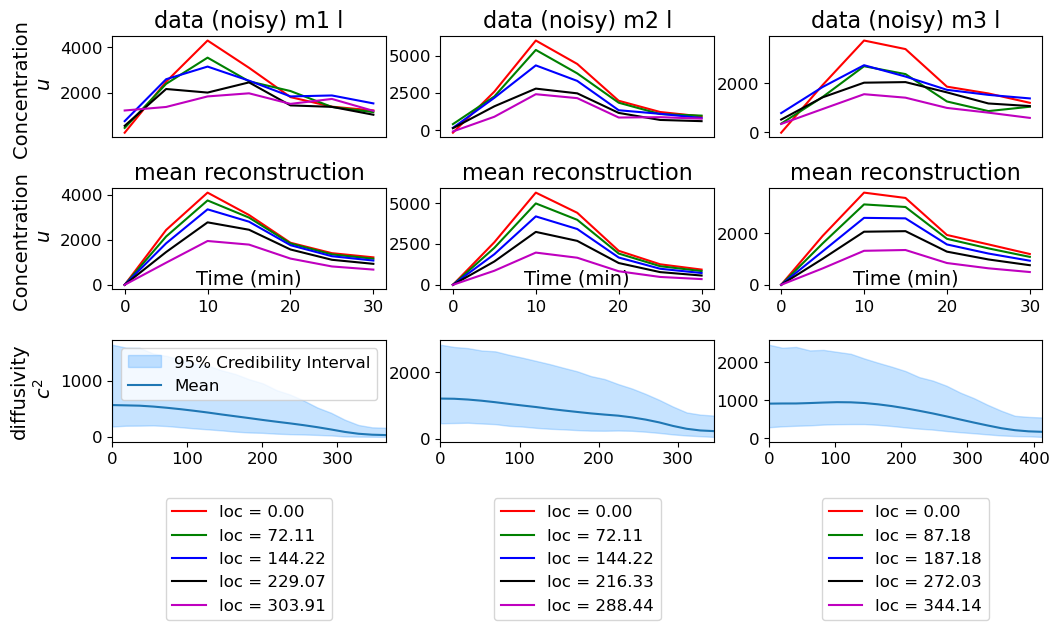

In [17]:
# Create a plot of 9 panels
#first row: noisy data, reconstruction, diffusion CI (large a)
#second row: noisy data, reconstruction, diffusion CI (small a)
#third row: PDF of advection (both) , ess (both) , empty

matplotlib_setup(12, 14, 16)




#Create a 3 by 3 grid of plots
# make 2 subplots to draw the legend in the bottom



fig= plt.figure( figsize=(12, 6.5))
lines_list = []
subfigs = fig.subfigures(2, 1, height_ratios=[4,1])

####################################################
idx1_pre = 0
axs = subfigs[0].subplots(3, 3 , gridspec_kw=dict( bottom=0.1, hspace=0.5))
plt.sca(axs[0, 0])

lines_list.append(plot_time_series(times=times_list[idx1_pre],
                 data=data_list[idx1_pre],
                 locations=locations_list[idx1_pre],
                 plot_legend=False))
plt.ylabel('Concentration \n $u$')
# add mouse and ear
plt.title('data (noisy) '+ short_tag[idx1_pre])
# turn of ticks
plt.xticks([])
plt.xlabel('')

plt.sca(axs[1, 0])
lines = plot_time_series(times=times_list[idx1_pre],
                 data=mean_recon_data_list[idx1_pre],
                 locations=locations_list[idx1_pre],
                 plot_legend=False)
plt.ylabel('Concentration \n $u$')
plt.title('mean reconstruction')
plt.gca().xaxis.set_label_coords(0.5, 0.2)

plt.sca(axs[2,0])
fig_ifo = samples_list[idx1_pre].plot_ci()
plt.xlim(0, L_list[idx1_pre])
plt.ylabel('diffusivity\n $c^2$')


####################################################
idx2 = 2


plt.sca(axs[0, 1])
lines_list.append(plot_time_series(times=times_list[idx2],
                 data=data_list[idx2],
                 locations=locations_list[idx2],
                 plot_legend=False))
plt.ylabel('')
# turn of ticks
plt.xticks([])
plt.xlabel('')
plt.title('data (noisy) '+ short_tag[idx2])


plt.sca(axs[1, 1])
lines = plot_time_series(times=times_list[idx2],
                 data=mean_recon_data_list[idx2],
                 locations=locations_list[idx2],
                 plot_legend=False)
plt.ylabel('')
plt.title('mean reconstruction')
plt.gca().xaxis.set_label_coords(0.5, 0.2)

plt.sca(axs[2,1])
fig_ifo = samples_list[idx2].plot_ci()
plt.xlim(0, L_list[idx2])
# legend off
plt.legend().set_visible(False)


####################################################
idx3 = 4

plt.sca(axs[0, 2])

lines_list.append(plot_time_series(times=times_list[idx3],
                 data=data_list[idx3],
                 locations=locations_list[idx3],
                 plot_legend=False))
plt.ylabel('')
# turn of ticks
plt.xticks([])
plt.xlabel('')
plt.title('data (noisy) '+ short_tag[idx3])


plt.sca(axs[1, 2])
lines = plot_time_series(times=times_list[idx3],
                 data=mean_recon_data_list[idx3],
                 locations=locations_list[idx3],
                 plot_legend=False)
plt.ylabel('')
plt.title('mean reconstruction')
# xlabel position up a bit

plt.gca().xaxis.set_label_coords(0.5, 0.2)

plt.sca(axs[2,2])
fig_ifo = samples_list[idx3].plot_ci()
plt.xlim(0, L_list[idx3])
# legend off
plt.legend().set_visible(False)

plt.tight_layout()

# third column





# plot legend
axLegend = subfigs[1].subplots(1, 3)
plt.sca(axLegend[0])
plt.axis('off')
plt.legend(lines_list[0][0], lines_list[0][1], ncol=1, loc='center', bbox_to_anchor=(0.5, 0.5))
# ["{:.0f}".format(location_i) for location_i in locations_list[0]], loc='center', bbox_to_anchor=(0.5, 0.5))

plt.sca(axLegend[1])
plt.axis('off')
plt.legend(lines_list[1][0], lines_list[1][1], ncol=1, loc='center', bbox_to_anchor=(0.5, 0.5))

plt.sca(axLegend[2])
plt.axis('off')
plt.legend(lines_list[2][0], lines_list[2][1], ncol=1, loc='center', bbox_to_anchor=(0.5, 0.5))

# print locations formated 2 space after decimal point

print(["{:.0f}".format(location_i) for location_i in locations_list[idx1_pre]])
#plt.tight_layout()
print(lines)

## 2. CA-ST (diffusion only)

### 2.1 synthetic (m1-l) : 1 case (varying)


1. Read data files

<div style="border: 2px solid #FFB74D; background-color: #FFF3E0; border-radius: 8px; padding: 10px; font-family: Arial, sans-serif; color: #333; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1); max-width: 750px; margin: 0 auto;">
  <strong style="color: #E65100;">⚠️ Note:</strong> 
  These results will be updated

  plot ess in the 8th panel
</div>

In [18]:
list_CASTSynthDiff = ['../../../Collab-BrainEfflux-Data/v21May2024_c/']*7
idx_list = [2, 0, 6, 4, 1, 3, 5]
list_CASTSynthDiff_tags = ["m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m4_l_NUTS_sampleMean_m4:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m4_r_NUTS_sampleMean_m4:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m3_r_NUTS_sampleMean_m3:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m6_r_NUTS_sampleMean_m6:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5",
                           "m3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5"]


print(len(list_CASTSynthDiff))

7


In [19]:
# order file names
list_CASTSynthDiff = [list_CASTSynthDiff[idx] for idx in idx_list]
list_CASTSynthDiff_tags = [list_CASTSynthDiff_tags[idx] for idx in idx_list]


In [20]:


# read the data
data_dict_list = []
for i in range(len(list_CASTSynthDiff)):
    data_dict_list.append(read_experiment_data(list_CASTSynthDiff[i], list_CASTSynthDiff_tags[i]))



Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/m1_l_NUTS_sampleMean_m1:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5/m1_r_NUTS_sampleMean_m1:r:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFromDiffusion_heterogeneous_1000_fromDataAvg_v21May2024_c__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/v21May2024_c//outputm3_l_NUTS_sampleMean_m3:l:NUTS:constant:100.0:real:heterogeneous:1000:0.1:v:April22:2024:a::4:5_syntheticFro

In [21]:
matplotlib_setup(12, 14, 16)

# powerpoint slide size in inches: 13.333 x 7.5 (widescreeen)
# obtain samples and plot the ci
samples_list = []
exact_list = []
locations_list = []
ess_list = []
# error in the data
exact_recon_data_error_CAST_synth = []
exact_recon_param_error_CAST_synth = []
noise_in_data_CAST_synth = []
recon_error_list = []
exact_data_list = []
mean_recon_data_list = []
for data_dict in data_dict_list:
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])
    exact_data_list.append(data_dict['exact_data'])
    mean_recon_data_list.append(data_dict['mean_recon_data'])
    # error in the data
    exact_recon_data_error_CAST_synth.append(np.linalg.norm(data_dict['exact_data'] - data_dict['mean_recon_data'])/np.linalg.norm(data_dict['exact_data']))
    exact_recon_param_error_CAST_synth.append(np.linalg.norm(data_dict['exact'] - data_dict['samples'].funvals.mean())/np.linalg.norm(data_dict['exact']))
    noise_in_data_CAST_synth.append(np.linalg.norm(data_dict['data'] - data_dict['exact_data'])/np.linalg.norm(data_dict['data']))


#Create a 3 by 3 grid of plots
fig, axs = plt.subplots(3, 3, figsize=(12, 6.5))
#Plot the first 7 samples in
for i in range(3):
    for j in range(3):
        idx = 3*i+j
        if idx == len(samples_list):
            # clear the axis
            axs[i, j].axis('off')
        elif idx > len(samples_list): 
            # plot legend
            plt.sca(axs[i, j])
            axs[i, j].axis('off')
            plt.legend(fig_ifo, ['Mean', 'Exact', '95% CI'], loc='lower center', bbox_to_anchor=(0.8, -0.2))
        else:
        
            samples = samples_list[idx]
            exact = exact_list[idx]
            plt.sca(axs[i, j])
            fig_ifo = samples.plot_ci(exact=exact)
            # plot vertical gray lines at the locations
            for location in locations_list[idx]:
                plt.axvline(x=location, color='gray', linestyle='--', alpha=0.5)
            # turn off the legend
            plt.legend().set_visible(False)
            # turn off x-axis label for all figures except image 5,6,7
            # which mouse, which ear
            plt.title(
                list_CASTSynthDiff_tags[idx].split('_')[0] + ' ' + list_CASTSynthDiff_tags[idx].split('_')[1],
                x=0.5, y=0.82)

# remove y ticks 
# add x label for (1,1), (1,2), (2,1)
axs[1, 1].set_xlabel('location')
axs[1, 2].set_xlabel('location')
axs[2, 0].set_xlabel('location')

# y label for (0,0), (1,0), (2,0)
axs[0, 0].set_ylabel('$c^2$')
axs[1, 0].set_ylabel('$c^2$')
axs[2, 0].set_ylabel('$c^2$')

# tighten the figure
plt.tight_layout()
# remove white space
plt.subplots_adjust(wspace=0.2, hspace=0.15)


ValueError: operands could not be broadcast together with shapes (140,) (20,7) 

In [ ]:
#min max avg

print('min ess:', np.min(ess_list))
print('max ess:', np.max(ess_list))
print('avg ess:', np.mean(ess_list))

###  2.2 real (all mice, all ears) : 8 cases (varying)

In [22]:

list_CASTRealDiff = ['../../../Collab-BrainEfflux-Data/April_2x_2024_b/']*6

# tags ordered by mouse and ear
list_CASTRealDiff_tags = ['m1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm6_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5',
                          'm6_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5']

print(len(list_CASTRealDiff))

6


In [23]:
# read the data
CASTRealDiff_dict_list = []
for i in range(len(list_CASTRealDiff)):
    CASTRealDiff_dict_list.append(read_experiment_data(list_CASTRealDiff[i], list_CASTRealDiff_tags[i]))

Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/m1_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/m1_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/m3_l_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5/m4_r_NUTS_constant_100.0_real_heterogeneous_1000_0.2_v_April22_2024_a__4_5_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/April_2x_2024_b//outputm6_l_NUTS_con

In [24]:
# powerpoint slide size in inches: 13.333 x 7.5 (widescreeen)
# obtain samples and plot the ci
samples_list = []
exact_list = []
locations_list = []
ess_list = []
data_error_list_CAST_real = []
std_over_data_list_CAST_real = []
mean_recon_data_list = []
data_list = []
for data_dict in CASTRealDiff_dict_list:
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])
    mean_recon_data_list.append(data_dict['mean_recon_data'])
    data_list.append(data_dict['data'])
    data_error_list_CAST_real.append(np.linalg.norm(data_list[-1]-mean_recon_data_list[-1])/ np.linalg.norm(data_list[-1]))
    # read data STD
    real_times, real_locations, real_data, real_std_data = read_data_files(data_dict['experiment_par'])
    std_over_data_list_CAST_real.append(np.linalg.norm(np.linalg.norm(real_std_data)/np.linalg.norm(real_data)))

CA and ST data.
CA and ST data.
CA and ST data.
CA and ST data.
CA and ST data.
CA and ST data.


In [25]:
# pri#print(data_error_list_v14septCARealDiff)
print(data_dict['experiment_par'].version)
# print min, max, avg
print('data error list')
print('min', np.min(data_error_list_CAST_real))
print('max', np.max(data_error_list_CAST_real))
print('avg', np.mean(data_error_list_CAST_real))
#print(std_over_data_list_v14septCARealDiff)
# print min, max, avg
print('std_over_data_list')
print('min', np.min(std_over_data_list_CAST_real))
print('max', np.max(std_over_data_list_CAST_real))
print('avg', np.mean(std_over_data_list_CAST_real))

# print ess
print('min ess:', np.min(ess_list))
print('max ess:', np.max(ess_list))
print('avg ess:', np.mean(ess_list))
print(ess_list)
print('#################')

v_April22_2024_a
data error list
min 0.29510029029406404
max 0.42450370330550485
avg 0.3398625123709785
std_over_data_list
min 0.2555836495771276
max 0.4668007265458224
avg 0.3688436459190743
min ess: 84.94432988442037
max ess: 1184.2933944150273
avg ess: 180.7413868964989
[array([864.04762058, 507.25167698, 125.73914539, 121.25223443,
       116.47202291, 116.08041724, 113.46456194, 112.19113394,
       112.67733172, 113.95282129, 111.58545117, 117.06033319,
       425.06740177, 123.68933322, 328.51797366, 254.70949726,
       222.77941819, 207.4615868 , 158.07897878, 144.38827319,
       135.64272014]), array([262.69879709, 190.93909262, 103.24825909,  98.38865885,
        91.82545791,  90.53459155,  87.00432843,  84.94432988,
        85.74133843,  86.17465673,  85.67370442,  88.27932158,
       157.42153495,  92.4725228 , 144.86893273, 141.03430345,
       132.17560067, 130.28952273, 124.87097456, 116.58369997,
       108.63907333]), array([904.69387553, 671.68102466,  97.97348395, 

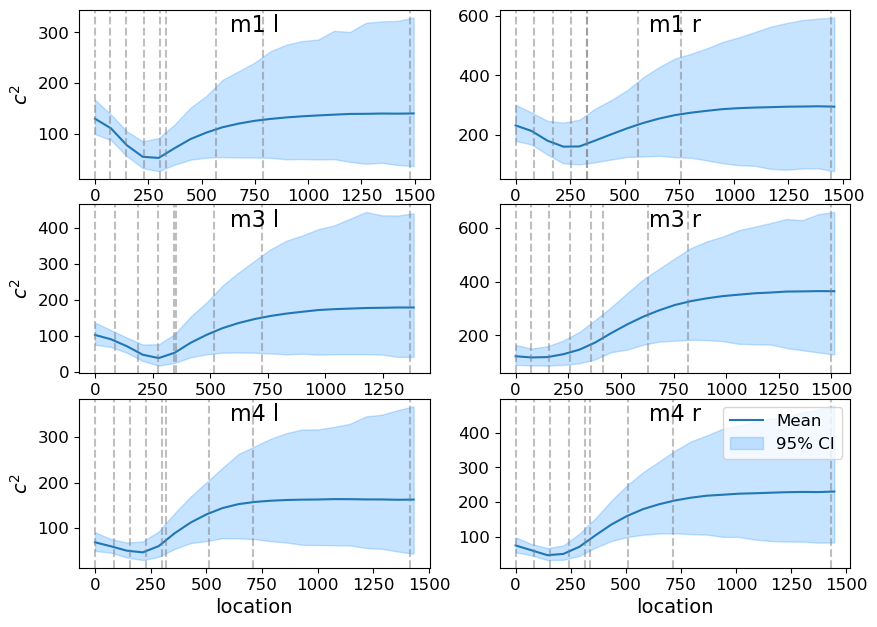

In [26]:
matplotlib_setup(12, 14, 16)




#Create a 3 by 3 grid of plots
fig, axs = plt.subplots(3, 2, figsize=(9, 6.5))
#Plot the first 7 samples in
for i in range(3):
    for j in range(2):
        idx = 2*i+j

        if True:
        
            samples = samples_list[idx]
            exact = exact_list[idx]
            plt.sca(axs[i, j])
            fig_ifo = samples.plot_ci()
            # plot vertical gray lines at the locations
            for location in locations_list[idx]:
                plt.axvline(x=location, color='gray', linestyle='--', alpha=0.5)
            # turn off the legend
            if idx != 5:
                plt.legend().set_visible(False)
            else:
                plt.legend([fig_ifo[0], fig_ifo[2]], ['Mean', '95% CI'])#, loc='lower center', bbox_to_anchor=(0.8, -0.2))
            # turn off x-axis label for all figures except image 5,6,7
            # which mouse, which ear
            plt.title(
                list_CASTSynthDiff_tags[idx].split('_')[0] + ' ' + list_CASTSynthDiff_tags[idx].split('_')[1],
                x=0.5, y=0.82)

# remove y ticks 
# add x label for (1,1), (1,2), (2,1)
axs[2, 0].set_xlabel('location')
axs[2, 1].set_xlabel('location')


# y label for (0,0), (1,0), (2,0)
axs[0, 0].set_ylabel('$c^2$')
axs[1, 0].set_ylabel('$c^2$')
axs[2, 0].set_ylabel('$c^2$')

# tighten the figure
plt.tight_layout()
# remove white space
plt.subplots_adjust(wspace=0.2, hspace=0.15)


In [29]:
fig_ifo
# print min, max, avg, ess
print('min ess:', np.min(ess_list))
print('max ess:', np.max(ess_list))
print('avg ess:', np.mean(ess_list))



min ess: 84.94432988442037
max ess: 1184.2933944150273
avg ess: 180.7413868964989


## 3. CA (advection-diffusion)

### 3.1 synthetic (m1-l) : 2 cases (varying/small_a/varying, varying/large_a/varying)

<div style="border: 2px solid #FFB74D; background-color: #FFF3E0; border-radius: 8px; padding: 10px; font-family: Arial, sans-serif; color: #333; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1); max-width: 750px; margin: 0 auto;">
  <strong style="color: #E65100;">⚠️ Note:</strong> 
  Use small a results when it is ready
</div>

In [30]:
v14septCASynthAdvDiff_dir = ['../../../Collab-BrainEfflux-Data/results8/']*2
v14septCASynthAdvDiff_tags = ['m1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.9_zero',
                              'm1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.1_zero']
 

In [31]:
#read the data files
v14septCASynthAdvDiff_dict_list = []
for i in range(len(v14septCASynthAdvDiff_dir)):
    v14septCASynthAdvDiff_dict_list.append(read_experiment_data(v14septCASynthAdvDiff_dir[i], v14septCASynthAdvDiff_tags[i]))

Reading file:  ../../../Collab-BrainEfflux-Data/results8//outputm1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.9_zero/m1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.9_zero_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/results8//outputm1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.1_zero/m1_l_NUTS_custom_1_100.0_syntheticFromDiffusion_advection_diffusion_3000_fromDataAvg_v14septCASynthAdvDiff__0_5_0.1_zero_var.pkl


In [32]:
# extract the samples and exact values, etc
samples_list = []
exact_list = []
locations_list = []
ess_list = []
data_list = []
mean_recon_data_list = []
times_list = []
exact_data_list = []
for data_dict in v14septCASynthAdvDiff_dict_list:
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])
    data_list.append(data_dict['data'])
    mean_recon_data_list.append(data_dict['mean_recon_data'])
    times_list.append(data_dict['times'])
    exact_data_list.append(data_dict['exact_data'])

/var/folders/rr/13wqhtdj7bx5n5j3bfdhsz5r0000gn/T/ipykernel_43122/702236560.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


['0', '72', '144', '229', '304']
([<matplotlib.lines.Line2D object at 0x197339e40>, <matplotlib.lines.Line2D object at 0x19733a0e0>, <matplotlib.lines.Line2D object at 0x19733a380>, <matplotlib.lines.Line2D object at 0x19733a620>, <matplotlib.lines.Line2D object at 0x19733a8c0>], ['loc = 0.00', 'loc = 72.11', 'loc = 144.22', 'loc = 229.07', 'loc = 303.91'])


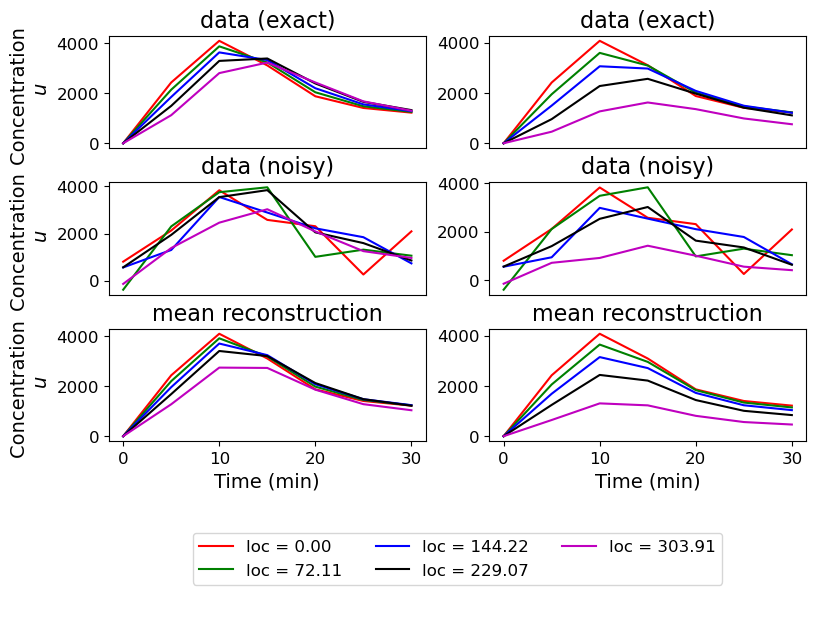

In [33]:
# Create a plot of 9 panels
#first row: noisy data, reconstruction, diffusion CI (large a)
#second row: noisy data, reconstruction, diffusion CI (small a)
#third row: PDF of advection (both) , ess (both) , empty

matplotlib_setup(12, 14, 16)




#Create a 3 by 3 grid of plots
# make 2 subplots to draw the legend in the bottom



fig= plt.figure( figsize=(9, 6.5))

subfigs = fig.subfigures(2, 1, height_ratios=[4,1])

axs = subfigs[0].subplots(3, 2 , gridspec_kw=dict( bottom=0.1, hspace=0.3))
plt.sca(axs[0, 0])
lines = plot_time_series(times=times_list[0],
                 data=exact_data_list[0].reshape(data_list[0].shape),
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('Concentration \n $u$')
plt.title('data (exact)')
# turn of ticks
plt.xticks([])
plt.xlabel('')

plt.sca(axs[1, 0])
lines = plot_time_series(times=times_list[0],
                 data=data_list[0],
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('Concentration \n $u$')
plt.title('data (noisy)')
# turn of ticks
plt.xticks([])
plt.xlabel('')

plt.sca(axs[2, 0])
lines = plot_time_series(times=times_list[0],
                 data=mean_recon_data_list[0],
                 locations=locations_list[0],
                 plot_legend=False)
plt.ylabel('Concentration \n $u$')
plt.title('mean reconstruction')


plt.sca(axs[0, 1])
lines = plot_time_series(times=times_list[1],
                 data=exact_data_list[1].reshape(data_list[1].shape),
                 locations=locations_list[1],
                 plot_legend=False)
plt.ylabel('')
# turn of ticks
plt.xticks([])
plt.xlabel('')
plt.title('data (exact)')

plt.sca(axs[1, 1])
lines = plot_time_series(times=times_list[1],
                 data=data_list[1],
                 locations=locations_list[1],
                 plot_legend=False)
plt.ylabel('')
# turn of ticks
plt.xticks([])
plt.xlabel('')
plt.title('data (noisy)')


plt.sca(axs[2, 1])
lines = plot_time_series(times=times_list[1],
                 data=mean_recon_data_list[1],
                 locations=locations_list[1],
                 plot_legend=False)
plt.ylabel('')
plt.title('mean reconstruction')

plt.tight_layout()

# plot legend
axLegend = subfigs[1].subplots(1, 1)
plt.sca(axLegend)
plt.axis('off')
plt.legend(lines[0], lines[1], ncol=3, loc='center', bbox_to_anchor=(0.5, 0.5))
# ["{:.0f}".format(location_i) for location_i in locations_list[0]], loc='center', bbox_to_anchor=(0.5, 0.5))


# print locations formated 2 space after decimal point

print(["{:.0f}".format(location_i) for location_i in locations_list[0]])
    
print(lines)


WARNING L MIGHT NOT BE ACCURATE


Text(0.18, 0.6, 'small $a$\ncase')

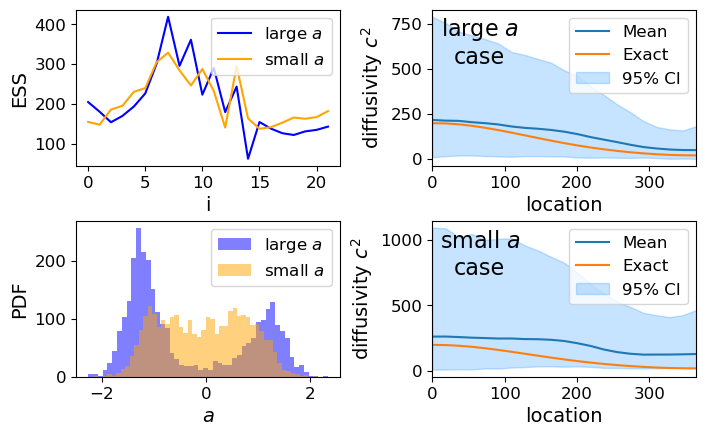

In [35]:
# Generate a figure with 3 rows and 1 column, top row is ESS for both cases, second row is PDF for both cases, diffusivity CI for both cases

fig, axs = plt.subplots(2, 2, figsize=(8, 6.5*2.2/3), gridspec_kw={'hspace':0.35, 'wspace':0.35})

# plot ESS
plt.sca(axs[0,0])
plt.plot(ess_list[0], label='large $a$', color='blue')
plt.plot(ess_list[1], label='small $a$', color='orange')
plt.ylabel('ESS')
plt.xlabel('i')
plt.legend()

# plot PDF
plt.sca(axs[1,0])
plt.hist(samples_list[0].samples[-1,:].flatten(), bins=50, alpha=0.5, label='large $a$', color='blue')
plt.hist(samples_list[1].samples[-1,:].flatten(), bins=50, alpha=0.5, label='small $a$', color='orange')

# annotate the mean
#plt.axvline(x=samples_list[0].samples[-1,:].mean(),
#             color='blue', linestyle='--')
#plt.axvline(x=samples_list[1].samples[-1,:].mean(),
#            color='orange', linestyle='--')
plt.ylabel('PDF')
plt.xlabel('advection speed $a$')
plt.xlabel('$a$')
plt.legend()

# plot diffusivity CI
plt.sca(axs[0,1])

print("WARNING L MIGHT NOT BE ACCURATE")
# PDE and coefficients grids
factor_L = 1.2 
L = locations_list[0][-1]*factor_L
coarsening_factor = 5
n_grid_c = 20


grid, grid_c, grid_c_fine, h, n_grid = build_grids(L, coarsening_factor, n_grid_c)
grid_c_geom = cuqi.geometry.MappedGeometry( cuqi.geometry.Continuous1D(grid_c), samples_list[0].geometry.map)
exact_new = cuqi.array.CUQIarray(exact_list[0].to_numpy()[:-1], geometry= grid_c_geom)
fig_ifo = cuqi.samples.Samples(samples_list[0].samples[:-1,:], geometry=grid_c_geom).plot_ci(exact=exact_new)
#fig_ifo2 = cuqi.samples.Samples(samples_list[1].samples[:-1,:], geometry=grid_c_geom).plot_ci(plot_envelope_kwargs={'facecolor': 'orange'})
plt.xlim(0, L)

plt.legend(fig_ifo, ['Mean', 'Exact', '95% CI'])
plt.ylabel('diffusivity $c^2$')
plt.xlabel('location')
plt.title('large $a$\ncase', y=0.6, x=0.18)


plt.sca(axs[1,1])
grid, grid_c, grid_c_fine, h, n_grid = build_grids(L, coarsening_factor, n_grid_c)
grid_c_geom = cuqi.geometry.MappedGeometry( cuqi.geometry.Continuous1D(grid_c), samples_list[1].geometry.map)
exact_new = cuqi.array.CUQIarray(exact_list[1].to_numpy()[:-1], geometry= grid_c_geom)
fig_ifo = cuqi.samples.Samples(samples_list[1].samples[:-1,:], geometry=grid_c_geom).plot_ci(exact=exact_new)
plt.xlim(0, L)
plt.legend(fig_ifo, ['Mean', 'Exact', '95% CI'])
plt.ylabel('diffusivity $c^2$')
plt.xlabel('location')
#plt.title('small $a$')
plt.title('small $a$\ncase', y=0.6, x=0.18)







<div style="border: 2px solid #FFB74D; background-color: #FFF3E0; border-radius: 8px; padding: 10px; font-family: Arial, sans-serif; color: #333; box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.1); max-width: 750px; margin: 0 auto;">
  <strong style="color: #E65100;">⚠️ Note:</strong> 
  maybe correlation figure here
</div>

In [ ]:
fig_ifo

In [ ]:

fig_ifo

In [36]:
# print min max ess, avg
print('min ess:', np.min(ess_list))
print('max ess:', np.max(ess_list))
print('avg ess:', np.mean(ess_list))
print(ess_list)

min ess: 62.74725384164154
max ess: 418.84634328254134
avg ess: 204.88863627588
[array([204.94165735, 180.87540756, 154.36599437, 170.19430391,
       193.70804312, 226.54679749, 301.61926163, 418.84634328,
       295.77271751, 361.30372002, 223.48999028, 290.58044116,
       179.72169549, 243.72209074,  62.74725384, 154.93769025,
       138.38854517, 126.88169897, 122.42867815, 131.39357181,
       135.22443897, 143.39619971]), array([155.15155456, 148.23949418, 186.2724051 , 195.50566847,
       230.64270208, 239.88606786, 305.34703694, 328.78904592,
       284.53390337, 246.58426958, 287.88967288, 232.78965917,
       141.01554527, 295.22796851, 164.07510755, 137.98324696,
       141.96199561, 153.28943272, 166.16964647, 163.1540167 ,
       167.24486691, 182.26014854])]


### 3.2 real (all mice, all ears) : 8 cases (varying)


In [37]:

v14septCARealAdvDiff_tags = ["m1_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero",
                             
"m1_r_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero",

"m2_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero",       
"m2_r_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero",
"m3_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero",   
"m4_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero",                                                                                                  
"m4_r_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero",       
"m6_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero",                                                                                                      
"m6_r_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero" ]
v14septCARealAdvDiff_dir = ['../../../Collab-BrainEfflux-Data/results10/']*len(v14septCARealAdvDiff_tags) 

len(v14septCARealAdvDiff_tags)

9

In [38]:
# read the data files
v14septCARealAdvDiff_dict_list = []
for i in range(len(v14septCARealAdvDiff_dir)):
    v14septCARealAdvDiff_dict_list.append(read_experiment_data(v14septCARealAdvDiff_dir[i], v14septCARealAdvDiff_tags[i]))



Reading file:  ../../../Collab-BrainEfflux-Data/results10//outputm1_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero/m1_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/results10//outputm1_r_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero/m1_r_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/results10//outputm2_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero/m2_l_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero_var.pkl
Reading file:  ../../../Collab-BrainEfflux-Data/results10//outputm2_r_NUTS_custom_1_100.0_real_advection_diffusion_3000_fromDataAvg_v14septCARealAdvDiff__0_5_0.1_zero/m2

In [39]:
# extract the samples and exact values, etc
samples_list = []
exact_list = []
locations_list = []
ess_list = []
data_list = []
mean_recon_data_list = []
times_list = []
exact_data_list = []
c_geom_list = []
L_list = []
short_tag = []
data_error_list_v14septCARealAdvDiff = []
std_over_data_list_v14septCARealAdvDiff = []
new_ess_list = []
for j, data_dict in enumerate(v14septCARealAdvDiff_dict_list):
    samples_list.append(data_dict['samples'])
    ess_list.append(samples_list[-1].compute_ess())
    exact_list.append(data_dict['exact'])
    locations_list.append(data_dict['locations'])
    data_list.append(data_dict['data'])
    mean_recon_data_list.append(data_dict['mean_recon_data'])
    times_list.append(data_dict['times'])
    exact_data_list.append(data_dict['exact_data'])
    factor_L = 1.2 
    L_list.append(locations_list[-1][-1]*factor_L)
    coarsening_factor = 5
    n_grid_c = 20
    grid, grid_c, grid_c_fine, h, n_grid = build_grids(L_list[-1], coarsening_factor, n_grid_c)
    c_geom_list.append(cuqi.geometry.MappedGeometry( cuqi.geometry.Continuous1D(grid_c), samples_list[0].geometry.map))
    short_tag.append(v14septCARealAdvDiff_tags[j].split('_')[0] + ' ' + v14septCARealAdvDiff_tags[j].split('_')[1])

    data_error_list_v14septCARealAdvDiff.append(np.linalg.norm(data_list[-1]-mean_recon_data_list[-1])/ np.linalg.norm(data_list[-1]))
    # read data STD
    real_times, real_locations, real_data, real_std_data = read_data_files(data_dict['experiment_par'])
    std_over_data_list_v14septCARealAdvDiff.append(np.linalg.norm(np.linalg.norm(real_std_data)/np.linalg.norm(real_data)))
    new_ess_list.append(ess_list[-1])

    
# remove idx (-1, -3, -5)
remove_idx = [6,8] #5,7,9
data_error_list_v14septCARealAdvDiff = np.delete(data_error_list_v14septCARealAdvDiff, remove_idx)
std_over_data_list_v14septCARealAdvDiff = np.delete(std_over_data_list_v14septCARealAdvDiff, remove_idx)
new_ess_list = [new_ess_list[i] for i in range(len(new_ess_list)) if i not in remove_idx]

print(data_dict['experiment_par'].version)
# print min, max, avg
print('data error list')
print(data_error_list_v14septCARealAdvDiff)
print('min', np.min(data_error_list_v14septCARealAdvDiff))
print('max', np.max(data_error_list_v14septCARealAdvDiff))
print('avg', np.mean(data_error_list_v14septCARealAdvDiff))

# print min, max, avg
print('std_over_data_list')
print(std_over_data_list_v14septCARealAdvDiff)
print('min', np.min(std_over_data_list_v14septCARealAdvDiff))
print('max', np.max(std_over_data_list_v14septCARealAdvDiff))
print('avg', np.mean(std_over_data_list_v14septCARealAdvDiff))
print('#################')
print(new_ess_list)
print(np.mean(new_ess_list))
print(np.min(new_ess_list))


CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
CA data.
v14septCARealAdvDiff
data error list
[0.2215984  0.19338265 0.1022123  0.19425452 0.19281899 0.12132692
 0.22240822]
min 0.1022123026197473
max 0.22240821645751177
avg 0.17828599872245435
std_over_data_list
[0.25560618 0.2547349  0.16621318 0.2547349  0.228329   0.17781562
 0.26911365]
min 0.16621317851093573
max 0.26911365186318764
avg 0.2295067779793036
#################
[array([155.76872295, 148.28176469, 171.19126883, 176.26916335,
       185.38919167, 200.60834123, 204.39186799, 209.29068543,
       222.22971338, 235.59803591, 241.80223318, 245.69385964,
       140.40441673, 314.39665721, 259.95960071, 140.8012741 ,
       135.20444105, 133.97284951, 141.00204997, 151.19837186,
       156.12194725, 167.67636356]), array([236.20645907, 196.561367  , 156.45864051, 157.26627124,
       205.64484054, 195.83205324, 218.50382292, 221.53923974,
       211.06881366, 248.76400139, 255.2925639 , 276.55316568,
 

In [40]:
# pri#print(data_error_list_v14septCARealDiff)
print(data_dict['experiment_par'].version)
# print min, max, avg
print('data error list')
print('min', np.min(data_error_list_v14septCARealAdvDiff))
print('max', np.max(data_error_list_v14septCARealAdvDiff))
print('avg', np.mean(data_error_list_v14septCARealAdvDiff))
#print(std_over_data_list_v14septCARealDiff)
# print min, max, avg
print('std_over_data_list')
print('min', np.min(std_over_data_list_v14septCARealAdvDiff))
print('max', np.max(std_over_data_list_v14septCARealAdvDiff))
print('avg', np.mean(std_over_data_list_v14septCARealAdvDiff))

v14septCARealAdvDiff
data error list
min 0.1022123026197473
max 0.22240821645751177
avg 0.17828599872245435
std_over_data_list
min 0.16621317851093573
max 0.26911365186318764
avg 0.2295067779793036


/var/folders/rr/13wqhtdj7bx5n5j3bfdhsz5r0000gn/T/ipykernel_43122/301315189.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


['0', '72', '144', '229', '304']
([<matplotlib.lines.Line2D object at 0x197851780>, <matplotlib.lines.Line2D object at 0x197851a20>, <matplotlib.lines.Line2D object at 0x197851cc0>, <matplotlib.lines.Line2D object at 0x197851f60>, <matplotlib.lines.Line2D object at 0x197852200>], ['loc = 0.00', 'loc = 87.18', 'loc = 187.18', 'loc = 272.03', 'loc = 344.14'])


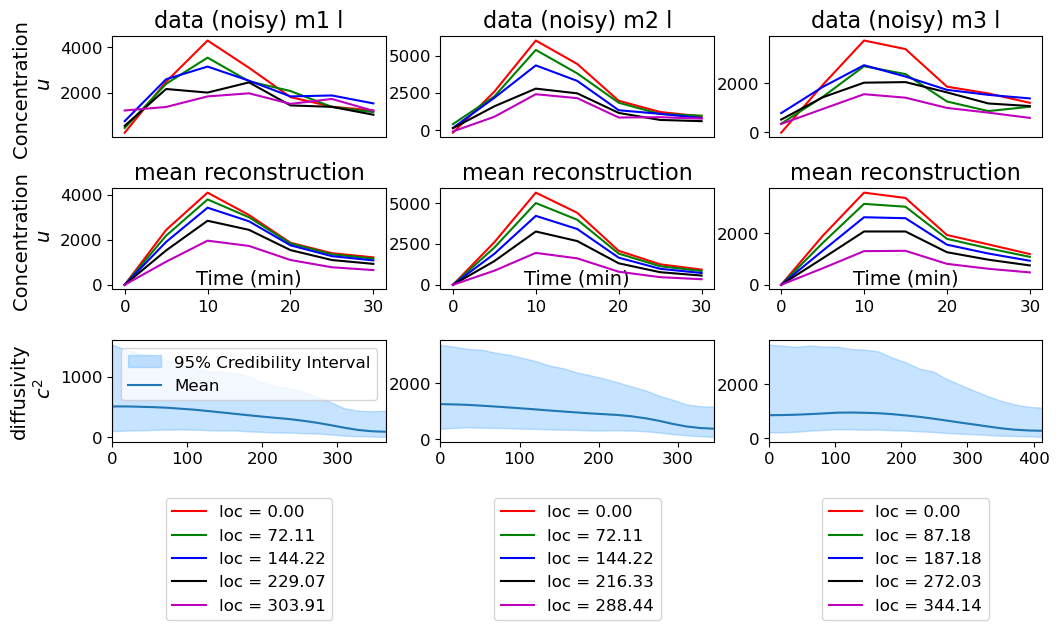

In [41]:
# Create a plot of 9 panels
#first row: noisy data, reconstruction, diffusion CI (large a)
#second row: noisy data, reconstruction, diffusion CI (small a)
#third row: PDF of advection (both) , ess (both) , empty

matplotlib_setup(12, 14, 16)




#Create a 3 by 3 grid of plots
# make 2 subplots to draw the legend in the bottom



fig= plt.figure( figsize=(12, 6.5))
lines_list = []
subfigs = fig.subfigures(2, 1, height_ratios=[4,1])

####################################################
idx1_pre = 0
axs = subfigs[0].subplots(3, 3 , gridspec_kw=dict( bottom=0.1, hspace=0.5))
plt.sca(axs[0, 0])

lines_list.append(plot_time_series(times=times_list[idx1_pre],
                 data=data_list[idx1_pre],
                 locations=locations_list[idx1_pre],
                 plot_legend=False))
plt.ylabel('Concentration \n $u$')
# add mouse and ear
plt.title('data (noisy) '+ short_tag[idx1_pre])
# turn of ticks
plt.xticks([])
plt.xlabel('')

plt.sca(axs[1, 0])
lines = plot_time_series(times=times_list[idx1_pre],
                 data=mean_recon_data_list[idx1_pre],
                 locations=locations_list[idx1_pre],
                 plot_legend=False)
plt.ylabel('Concentration \n $u$')
plt.title('mean reconstruction')
plt.gca().xaxis.set_label_coords(0.5, 0.2)

plt.sca(axs[2,0])
fig_ifo = cuqi.samples.Samples(samples_list[idx1_pre].samples[:-1,:], geometry=c_geom_list[idx1_pre]).plot_ci()
plt.xlim(0, L_list[idx1_pre])
plt.ylabel('diffusivity\n $c^2$')


####################################################
idx2 = 2


plt.sca(axs[0, 1])
lines_list.append(plot_time_series(times=times_list[idx2],
                 data=data_list[idx2],
                 locations=locations_list[idx2],
                 plot_legend=False))
plt.ylabel('')
# turn of ticks
plt.xticks([])
plt.xlabel('')
plt.title('data (noisy) '+ short_tag[idx2])


plt.sca(axs[1, 1])
lines = plot_time_series(times=times_list[idx2],
                 data=mean_recon_data_list[idx2],
                 locations=locations_list[idx2],
                 plot_legend=False)
plt.ylabel('')
plt.title('mean reconstruction')
plt.gca().xaxis.set_label_coords(0.5, 0.2)

plt.sca(axs[2,1])
fig_ifo = cuqi.samples.Samples(samples_list[idx2].samples[:-1,:], geometry=c_geom_list[idx2]).plot_ci()
plt.xlim(0, L_list[idx2])
# legend off
plt.legend().set_visible(False)


####################################################
idx3 = 4

plt.sca(axs[0, 2])

lines_list.append(plot_time_series(times=times_list[idx3],
                 data=data_list[idx3],
                 locations=locations_list[idx3],
                 plot_legend=False))
plt.ylabel('')
# turn of ticks
plt.xticks([])
plt.xlabel('')
plt.title('data (noisy) '+ short_tag[idx3])


plt.sca(axs[1, 2])
lines = plot_time_series(times=times_list[idx3],
                 data=mean_recon_data_list[idx3],
                 locations=locations_list[idx3],
                 plot_legend=False)
plt.ylabel('')
plt.title('mean reconstruction')
# xlabel position up a bit

plt.gca().xaxis.set_label_coords(0.5, 0.2)

plt.sca(axs[2,2])
fig_ifo = cuqi.samples.Samples(samples_list[idx3].samples[:-1,:], geometry=c_geom_list[idx3]).plot_ci()
plt.xlim(0, L_list[idx3])
# legend off
plt.legend().set_visible(False)

plt.tight_layout()

# third column





# plot legend
axLegend = subfigs[1].subplots(1, 3)
plt.sca(axLegend[0])
plt.axis('off')
plt.legend(lines_list[0][0], lines_list[0][1], ncol=1, loc='center', bbox_to_anchor=(0.5, 0.5))
# ["{:.0f}".format(location_i) for location_i in locations_list[0]], loc='center', bbox_to_anchor=(0.5, 0.5))

plt.sca(axLegend[1])
plt.axis('off')
plt.legend(lines_list[1][0], lines_list[1][1], ncol=1, loc='center', bbox_to_anchor=(0.5, 0.5))

plt.sca(axLegend[2])
plt.axis('off')
plt.legend(lines_list[2][0], lines_list[2][1], ncol=1, loc='center', bbox_to_anchor=(0.5, 0.5))

# print locations formated 2 space after decimal point

print(["{:.0f}".format(location_i) for location_i in locations_list[idx1_pre]])
#plt.tight_layout()
print(lines)

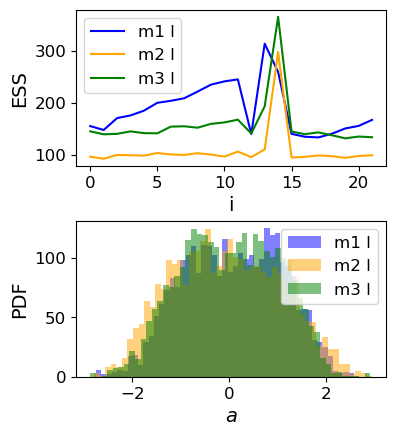

In [42]:
# Generate a figure with 3 rows and 1 column, top row is ESS for both cases, second row is PDF for both cases, diffusivity CI for both cases

fig, axs = plt.subplots(2, 1, figsize=(4, 6.5*2.2/3), gridspec_kw={'hspace':0.35})


# plot ESS
plt.sca(axs[0])
plt.plot(ess_list[idx1_pre], label=short_tag[idx1_pre], color='blue')
plt.plot(ess_list[idx2], label=short_tag[idx2], color='orange')
plt.plot(ess_list[idx3], label=short_tag[idx3], color='green')
plt.ylabel('ESS')
plt.xlabel('i')
plt.legend()

# plot PDF
plt.sca(axs[1])
plt.hist(samples_list[idx1_pre].samples[-1,:].flatten(), bins=50, alpha=0.5, label=short_tag[idx1_pre], color='blue')
plt.hist(samples_list[idx2].samples[-1,:].flatten(), bins=50, alpha=0.5, label=short_tag[idx2], color='orange')
plt.hist(samples_list[idx3].samples[-1,:].flatten(), bins=50, alpha=0.5, label=short_tag[idx3], color='green')
# annotate the mean
#plt.axvline(x=samples_list[0].samples[-1,:].mean(),
#             color='blue', linestyle='--')
#plt.axvline(x=samples_list[1].samples[-1,:].mean(),
#            color='orange', linestyle='--')
plt.ylabel('PDF')
plt.xlabel('advection speed $a$')
plt.xlabel('$a$')
plt.legend()

